In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/crawled_data/clean_flight.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Airline(s),Origin,Destination,Depart Hour,Depart Min,Travel Hours,Price (VND)
0,VietJet Air,SGN,HAN,10.0,45.0,2.166667,1913010
1,VietJet Air,SGN,HAN,10.0,45.0,2.166667,1913010
2,VietJet Air,SGN,HAN,10.0,50.0,2.166667,1913010
3,VietJet Air,SGN,HAN,9.0,45.0,2.166667,2189902
4,VietJet Air,SGN,HAN,6.0,45.0,2.166667,1971662


# Data analysis

### Số lượng chuyến bay của từng hãng là bao nhiêu?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Airline')

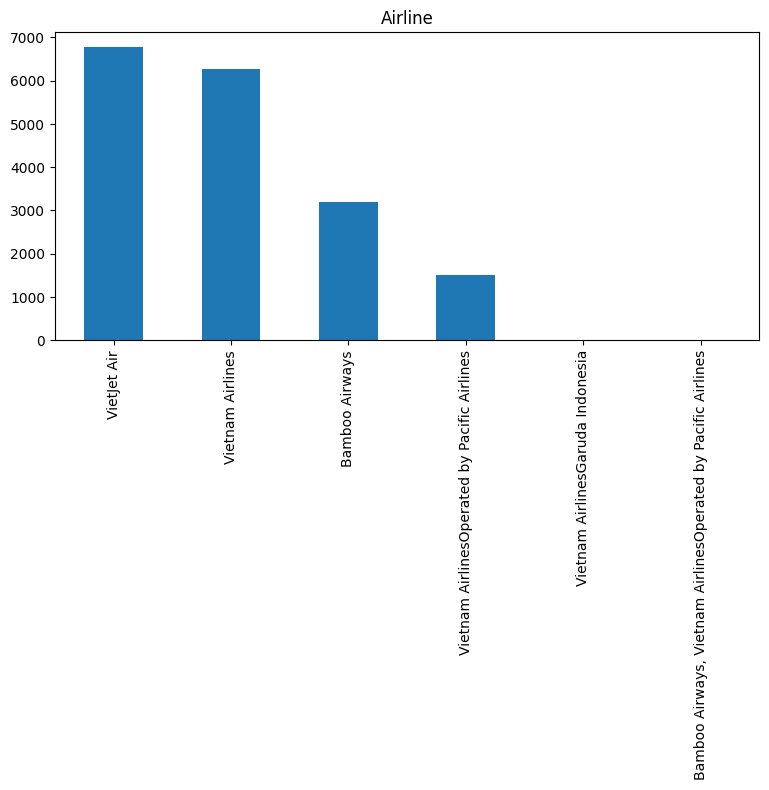

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(121)
df['Airline(s)'].value_counts().plot(kind='bar')
plt.title('Airline')
# Đoạn code này sử dụng thư viện matplotlib để vẽ một biểu đồ cột (bar chart) để đếm số lần xuất hiện của các hãng hàng không (Airline(s)) trong dữ liệu.
# plt.figure(figsize=(20, 4)): tạo một figure với kích thước là 20x4 inch.
# plt.subplot(121): tạo một subplot trong figure với số lượng hàng=1, số lượng cột=2 và chọn subplot thứ nhất (vị trí 1).
# df['Airline(s)'].value_counts().plot(kind='bar'): đếm số lần xuất hiện của từng giá trị trong cột 'Airline(s)' và vẽ biểu đồ cột (bar chart) cho kết quả.
# plt.title('Airline'): đặt tiêu đề cho subplot là 'Airline'.